## **Introdução ao spaCy**


Documentação: [spaCy 101](https://spacy.io/usage/spacy-101)

É uma biblioteca Python para processamento de textos. Uso em escala industrial, feito para uso em produção e criação de aplicações que conseguem processar um grande volume de dados.

Modelos pré treinados: 

- entidades nomeadas;
- classes gramaticais;
- dependências sintáticas.

Detalhes sobre os modelos: [Língua Portuguesa](https://spacy.io/models/pt/)

### **Introdução**

In [1]:
 import spacy

Instalando a versão mais atualizada do spaCy:

In [2]:
!pip install -U spacy

Requirement already up-to-date: spacy in /usr/local/lib/python3.7/dist-packages (3.0.6)


Instalando os pacotes extras e o modelo de linguagem: 

In [3]:
!pip install -U spacy-lookups-data

Requirement already up-to-date: spacy-lookups-data in /usr/local/lib/python3.7/dist-packages (1.0.0)


In [4]:
!python -m spacy download pt_core_news_lg

2021-05-27 22:03:53.587564: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 578.1MB 24kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


Utilizando o spaCy e os pacotes, tendo como base o "*corpus.txt*".

In [5]:
import spacy 

texto = "A vitória dos Giants, porém, também ficará para a história. Pela primeira vez, irmãos quarterbacks triunfam no Super Bowl em temporadas consecutivas. No ano passado, Peyton Manning, irmão de Eli, chegou ao título máximo da NFL pelo Indianapolis Colts."

nlp = spacy.load('pt_core_news_lg')

doc = nlp(texto)

In [6]:
doc

A vitória dos Giants, porém, também ficará para a história. Pela primeira vez, irmãos quarterbacks triunfam no Super Bowl em temporadas consecutivas. No ano passado, Peyton Manning, irmão de Eli, chegou ao título máximo da NFL pelo Indianapolis Colts.

In [7]:
type(doc)

spacy.tokens.doc.Doc

Imprimindo todos os tokens:

In [8]:
tokens = [token for token in doc]
tokens

[A,
 vitória,
 dos,
 Giants,
 ,,
 porém,
 ,,
 também,
 ficará,
 para,
 a,
 história,
 .,
 Pela,
 primeira,
 vez,
 ,,
 irmãos,
 quarterbacks,
 triunfam,
 no,
 Super,
 Bowl,
 em,
 temporadas,
 consecutivas,
 .,
 No,
 ano,
 passado,
 ,,
 Peyton,
 Manning,
 ,,
 irmão,
 de,
 Eli,
 ,,
 chegou,
 ao,
 título,
 máximo,
 da,
 NFL,
 pelo,
 Indianapolis,
 Colts,
 .]

Pegando as strings:

In [9]:
tokens_orth = [token.orth_ for token in doc]
tokens_orth

['A',
 'vitória',
 'dos',
 'Giants',
 ',',
 'porém',
 ',',
 'também',
 'ficará',
 'para',
 'a',
 'história',
 '.',
 'Pela',
 'primeira',
 'vez',
 ',',
 'irmãos',
 'quarterbacks',
 'triunfam',
 'no',
 'Super',
 'Bowl',
 'em',
 'temporadas',
 'consecutivas',
 '.',
 'No',
 'ano',
 'passado',
 ',',
 'Peyton',
 'Manning',
 ',',
 'irmão',
 'de',
 'Eli',
 ',',
 'chegou',
 'ao',
 'título',
 'máximo',
 'da',
 'NFL',
 'pelo',
 'Indianapolis',
 'Colts',
 '.']

Imprimindo somente elementos alfabéticos:

In [10]:
tokens_orth = [token.orth_ for token in doc]
print([token.orth_ for token in doc if token.is_alpha])

['A', 'vitória', 'dos', 'Giants', 'porém', 'também', 'ficará', 'para', 'a', 'história', 'Pela', 'primeira', 'vez', 'irmãos', 'quarterbacks', 'triunfam', 'no', 'Super', 'Bowl', 'em', 'temporadas', 'consecutivas', 'No', 'ano', 'passado', 'Peyton', 'Manning', 'irmão', 'de', 'Eli', 'chegou', 'ao', 'título', 'máximo', 'da', 'NFL', 'pelo', 'Indianapolis', 'Colts']


Imprimindo somente elementos numéricos:

In [11]:
tokens_orth = [token.orth_ for token in doc]
print([token.orth_ for token in doc if token.is_digit])

[]


Imprimindo pontuação:

In [12]:
tokens_orth = [token.orth_ for token in doc]
print([token.orth_ for token in doc if token.is_punct])

[',', ',', '.', ',', '.', ',', ',', ',', '.']


Podemos identificar: pontuação, espaços, símbolos financeiros, números, e-mails, stopwords e [muitos outros atributos](https://spacy.io/api/token#attributes)...

Identificando stopwords, por exemplo:

In [13]:
print(doc[0].is_stop)

True


In [14]:
print(doc[1].is_stop)

False


In [15]:
tokens_orth = [token.orth_ for token in doc]
print([token.orth_ for token in doc if token.is_stop])

['A', 'dos', 'porém', 'também', 'para', 'a', 'Pela', 'primeira', 'vez', 'no', 'em', 'No', 'de', 'ao', 'máximo', 'da', 'pelo']


### **Lematização**

Colocando os verbos no infinitivo:

In [16]:
import spacy 

texto = "A vitória dos Giants, porém, também ficará para a história. Pela primeira vez, irmãos quarterbacks triunfam no Super Bowl em temporadas consecutivas. No ano passado, Peyton Manning, irmão de Eli, chegou ao título máximo da NFL pelo Indianapolis Colts."

nlp = spacy.load('pt_core_news_lg')

doc = nlp(texto)

lemmas = [token.lemma_ for token in doc if token.pos_ == 'VERB']

In [17]:
lemmas

['ficar', 'triunfar', 'chegar']

### **Classes gramaticais**

In [18]:
etiquetado = [(token.orth_, token.pos_) for token in doc]

In [19]:
etiquetado

[('A', 'DET'),
 ('vitória', 'NOUN'),
 ('dos', 'ADP'),
 ('Giants', 'PROPN'),
 (',', 'PUNCT'),
 ('porém', 'CCONJ'),
 (',', 'PUNCT'),
 ('também', 'ADV'),
 ('ficará', 'VERB'),
 ('para', 'ADP'),
 ('a', 'DET'),
 ('história', 'NOUN'),
 ('.', 'PUNCT'),
 ('Pela', 'NOUN'),
 ('primeira', 'ADP'),
 ('vez', 'NOUN'),
 (',', 'PUNCT'),
 ('irmãos', 'NOUN'),
 ('quarterbacks', 'NOUN'),
 ('triunfam', 'VERB'),
 ('no', 'ADP'),
 ('Super', 'PROPN'),
 ('Bowl', 'PROPN'),
 ('em', 'ADP'),
 ('temporadas', 'NOUN'),
 ('consecutivas', 'ADJ'),
 ('.', 'PUNCT'),
 ('No', 'ADP'),
 ('ano', 'NOUN'),
 ('passado', 'ADJ'),
 (',', 'PUNCT'),
 ('Peyton', 'PROPN'),
 ('Manning', 'PROPN'),
 (',', 'PUNCT'),
 ('irmão', 'NOUN'),
 ('de', 'ADP'),
 ('Eli', 'PROPN'),
 (',', 'PUNCT'),
 ('chegou', 'VERB'),
 ('ao', 'ADP'),
 ('título', 'NOUN'),
 ('máximo', 'ADJ'),
 ('da', 'ADP'),
 ('NFL', 'PROPN'),
 ('pelo', 'ADP'),
 ('Indianapolis', 'PROPN'),
 ('Colts', 'PROPN'),
 ('.', 'PUNCT')]

Um mais detalhado:

In [20]:
etiquetado_morph = [(token.orth_, token.morph) for token in doc]

In [21]:
etiquetado_morph

[('A', Definite=Def|Gender=Fem|Number=Sing|PronType=Art),
 ('vitória', Gender=Fem|Number=Sing),
 ('dos', Definite=Def|Gender=Masc|Number=Plur|PronType=Art),
 ('Giants', Gender=Masc|Number=Plur),
 (',', ),
 ('porém', ),
 (',', ),
 ('também', ),
 ('ficará', Mood=Ind|Number=Sing|Person=3|Tense=Fut|VerbForm=Fin),
 ('para', ),
 ('a', Definite=Def|Gender=Fem|Number=Sing|PronType=Art),
 ('história', Gender=Fem|Number=Sing),
 ('.', ),
 ('Pela', Gender=Masc|Number=Sing),
 ('primeira', ),
 ('vez', Gender=Masc|Number=Sing),
 (',', ),
 ('irmãos', Gender=Masc|Number=Plur),
 ('quarterbacks', Gender=Masc|Number=Sing),
 ('triunfam', Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin),
 ('no', Definite=Def|Gender=Masc|Number=Sing|PronType=Art),
 ('Super', Gender=Masc|Number=Sing),
 ('Bowl', Number=Sing),
 ('em', ),
 ('temporadas', Gender=Fem|Number=Plur),
 ('consecutivas', Gender=Fem|Number=Plur),
 ('.', ),
 ('No', Definite=Def|Gender=Masc|Number=Sing|PronType=Art),
 ('ano', Gender=Masc|Number=Sing)

### **Entidades nomeadas**

In [22]:
import spacy 

texto = "A vitória dos Giants, porém, também ficará para a história. Pela primeira vez, irmãos quarterbacks triunfam no Super Bowl em temporadas consecutivas. No ano passado, Peyton Manning, irmão de Eli, chegou ao título máximo da NFL pelo Indianapolis Colts."

nlp = spacy.load('pt_core_news_lg')

doc = nlp(texto)

entidades = list(doc.ents)

In [23]:
entidades

[Giants, Super Bowl, Peyton Manning, Eli, NFL, Indianapolis Colts]

Detalhando as entidades:

In [24]:
ent_det = [(entidade, entidade.label_) for entidade in entidades]

In [25]:
ent_det 

[(Giants, 'ORG'),
 (Super Bowl, 'ORG'),
 (Peyton Manning, 'PER'),
 (Eli, 'PER'),
 (NFL, 'ORG'),
 (Indianapolis Colts, 'ORG')]

Visualizar entidades de forma gráfica:

In [26]:
import spacy
from pathlib import Path

In [27]:
html = spacy.displacy.render(doc, style = 'ent')

open('/content/drive/MyDrive/Cursos/PLN_USP/entidades_nomeadas.html', 'w', encoding = 'utf-8').write(html)

2078

In [28]:
html

'<div class="entities" style="line-height: 2.5; direction: ltr">A vitória dos \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Giants\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n, porém, também ficará para a história. Pela primeira vez, irmãos quarterbacks triunfam no \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Super Bowl\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n em temporadas consecutivas. No ano passado, \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Peyton Manning\n    <span style="font

Exemplo:

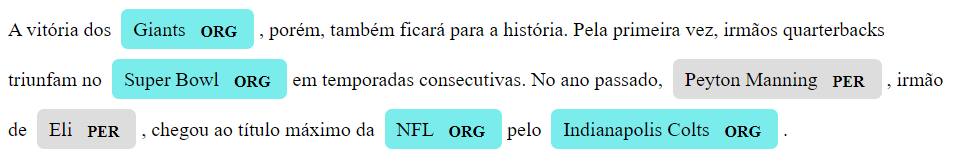

### **Análise sintática**

In [29]:
import spacy 

texto = "A vitória dos Giants, porém, também ficará para a história. Pela primeira vez, irmãos quarterbacks triunfam no Super Bowl em temporadas consecutivas. No ano passado, Peyton Manning, irmão de Eli, chegou ao título máximo da NFL pelo Indianapolis Colts."

nlp = spacy.load('pt_core_news_lg')

doc = nlp(texto)

sintatica = [(token.orth_, token.dep_) for token in doc]

In [30]:
sintatica

[('A', 'det'),
 ('vitória', 'nsubj'),
 ('dos', 'case'),
 ('Giants', 'nmod'),
 (',', 'punct'),
 ('porém', 'cc'),
 (',', 'punct'),
 ('também', 'advmod'),
 ('ficará', 'ROOT'),
 ('para', 'case'),
 ('a', 'det'),
 ('história', 'obl'),
 ('.', 'punct'),
 ('Pela', 'obl'),
 ('primeira', 'case'),
 ('vez', 'nmod'),
 (',', 'punct'),
 ('irmãos', 'nsubj'),
 ('quarterbacks', 'appos'),
 ('triunfam', 'ROOT'),
 ('no', 'case'),
 ('Super', 'obl'),
 ('Bowl', 'flat:name'),
 ('em', 'case'),
 ('temporadas', 'obl'),
 ('consecutivas', 'amod'),
 ('.', 'punct'),
 ('No', 'case'),
 ('ano', 'obl'),
 ('passado', 'amod'),
 (',', 'punct'),
 ('Peyton', 'nsubj'),
 ('Manning', 'flat:name'),
 (',', 'punct'),
 ('irmão', 'appos'),
 ('de', 'case'),
 ('Eli', 'nmod'),
 (',', 'punct'),
 ('chegou', 'ROOT'),
 ('ao', 'case'),
 ('título', 'obl'),
 ('máximo', 'amod'),
 ('da', 'case'),
 ('NFL', 'nmod'),
 ('pelo', 'case'),
 ('Indianapolis', 'obl'),
 ('Colts', 'flat:name'),
 ('.', 'punct')]

In [31]:
svg = spacy.displacy.render(doc, style = 'dep')
open('/content/drive/MyDrive/Cursos/PLN_USP/analise_sintatica.svg', 'w', encoding = 'utf-8').write(svg)

31195

In [32]:
svg

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="pt" id="03edde44e5c54dbbb480c69636322202-0" class="displacy" width="6875" height="574.5" direction="ltr" style="max-width: none; height: 574.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">A</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">DET</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="225">vitória</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="400">dos</tspan>\n    <tspan class="displacy-tag

Exemplo:

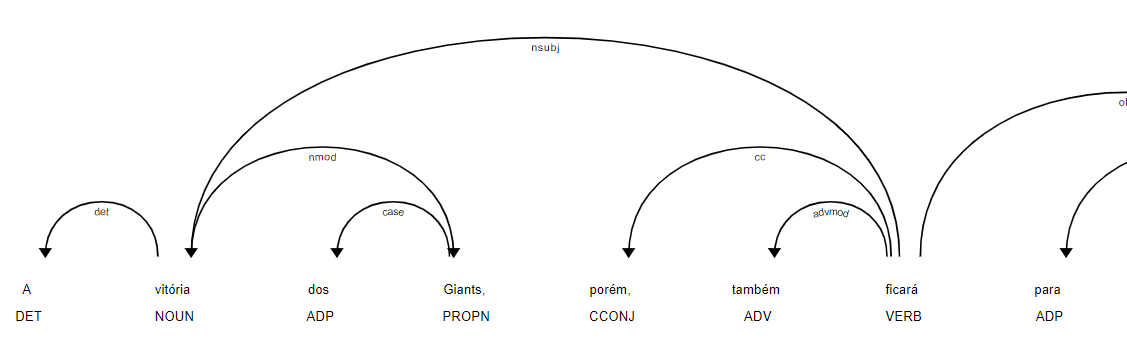

**Visualizadores: [DisplaCy](https://explosion.ai/demos/displacy-ent) e [ExplosionAI](https://explosion.ai/demos/displacy).**

### **Similaridade semântica e sintática entre as palavras**

Exemplo:

In [33]:
palavras = "conversar falar correr"

doc_novo = nlp(palavras)

similar = [token for token in doc_novo]

Similaridade entre item 0 (conversar) e item 1 (falar):

In [34]:
print(similar[0].similarity(similar[1]))

0.73501545


Similaridade entre item 0 (conversar) e item 2 (correr):

In [35]:
print(similar[0].similarity(similar[2]))

0.44497716


Outro jeito de fazer:

1. verificar se existem as palavras dentro do vocabulário:

In [38]:
import spacy

nlp = spacy.load('pt_core_news_lg')

In [39]:
homem = nlp.vocab['homem']
mulher = nlp.vocab['mulher']

2. imprimir os vetores:

In [40]:
print(homem.vector)

[ 1.5628    0.35001   0.95894   0.87086   0.90007  -0.8252   -0.10806
  2.7155   -2.7379    1.8683   -2.1603    1.2901    2.5367   -2.4035
 -1.0417    2.1815   -0.26488  -0.22896   0.12723   0.017229 -3.0017
 -1.9135   -0.1793   -0.34284  -1.2609    3.3128   -0.42028   3.6629
  4.0866    0.33137   0.11477   1.9094   -0.99401  -0.4619    1.7573
  1.3596   -0.29963   0.63758   1.3071    0.87926  -1.1583   -3.0824
  2.1434    1.0237   -1.7759    0.9988    0.42653  -0.32242   3.5361
  0.89827  -0.25279   0.84745   0.39549   0.47672  -1.6683   -0.8308
  1.2676   -1.5293    3.5994    1.0038    0.64212   3.4748    4.358
  4.0872    0.057697 -1.1605    0.60348   2.3968    2.5005   -2.3615
  2.1844   -2.9548    0.77437  -0.16696   0.45305  -2.2153    2.5138
  2.2717   -3.2666    1.0141    1.6822   -3.7702   -0.19793  -1.63
 -2.3892    4.0511    1.8723    0.81808   1.7147    2.3272   -1.3712
 -3.565     3.2667   -1.3828   -0.14155   0.92273   5.0704   -0.2254
 -2.4137    1.8533    1.1647    0.45

In [41]:
print(mulher.vector)

[ 0.80819  -2.2452    0.1131    2.5835    0.05711   0.48347  -0.07803
  1.4165    0.94434   1.644     1.3424    0.29624   2.4274   -2.6081
  1.5715   -0.24069   0.72092   0.57873   1.797     0.33063  -2.2948
 -0.079408 -0.59775   1.1585   -0.67636   2.8536   -2.3383    2.0324
  3.5659    1.9935    0.11546   2.3282    0.72223  -0.44262  -0.85315
  3.2992   -0.54552  -0.091286  0.74782   0.84112  -2.2344   -2.1892
  1.329     0.83005  -1.8265    0.45638   0.94143  -1.3718    2.4856
  1.634     1.335     0.63346  -1.8485   -0.022359  0.025702 -1.2586
  1.7547   -0.89136   1.8941    0.62589   0.85134  -0.018323  3.0729
  1.0345   -2.2123   -1.0948   -0.41639   1.5522    2.47     -3.4984
 -0.70304  -4.4897   -1.0192   -1.5682    3.2154   -1.4879    2.1225
  1.4327   -2.3172    1.2108   -0.99788  -1.8855    0.021806 -2.4223
 -1.3973    2.9436    1.2364    2.2046    2.6748    1.1412   -1.719
 -1.3036    0.57463  -1.4438   -1.0915   -0.33134   3.7377    0.10653
 -1.8965    2.3545    1.6079   -

3. verificar o tamanho do vetor:

In [42]:
print(len(homem.vector))

300


In [43]:
print(len(mulher.vector))

300


4. verificar a similaridade:

In [44]:
homem.similarity(mulher)

0.6595782

In [45]:
mulher.similarity(homem)

0.6595782

*A aula ocorreu nos dias 19 de maio de 2021, das 14h às 18h.*